## AGENDA
## 1.How Did I get this data
## 2.Original Twitter Dump Code
## 3.Libraries in Use
## 4.Senator List Reference
## 5.Modified Twitter Puller
## 6.Having Fun With HDP
## 7.Having Fun With TF-IDF
## 8. Similiarities
## 9. LDA MODEL
## 10. Lets Make a Box Plot!

## How did i get this DATA:


How did i get this DATA:
    
    ALL Hail the Twitter API. I used the Twitter API to pull the tweets 16 Senators in the 115th Congress. (Code Below). The code dumps each Tweet, ID, and date created. Although I stole this code from the internet,I did modify it so that the outcome includes "Author" (Source: https://gist.github.com/yanofsky/5436496). To explor the data I did 3 things:
    1.I made sure that all tweets were coming through.
    2. I checked the encoding so that i could make appropriate encoding decisions.
    3. I took note of stop words because the normal stopword list was no sufficient. 

#ORIGINAL CODE
#!/usr/bin/env python
#encoding: utf-8

import tweepy #https://github.com/tweepy/tweepy
import csv

#Twitter API credentials
consumer_key = "tj5hzNi46sx66ve06XmgF4MPN"
consumer_secret = "sDj1V1gSCDAzC5YQynZkKRTA30zsBCTv9NeOAuB41EcgEPEq2v"
access_key = "18608334-d4O1jsyKdVf2CHTplnXsd51Rnpnty7LBh5CKJigWN"
access_secret = "etVsvy0G3zrqlkmd1GuCzoT6ur3i0auhQ3X3ZsPwl83MW"



def get_all_tweets(screen_name):
	#Twitter only allows access to a users most recent 3240 tweets with this method
	
	#authorize twitter, initialize tweepy
	screen_name=input()

	auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
	auth.set_access_token(access_key, access_secret)
	api = tweepy.API(auth)
	
	#initialize a list to hold all the tweepy Tweets
	alltweets = []	
	
	#make initial request for most recent tweets (200 is the maximum allowed count)
	new_tweets = api.user_timeline(screen_name = screen_name,count=200)
	
	#save most recent tweets
	alltweets.extend(new_tweets)
	
	#save the id of the oldest tweet less one
	oldest = alltweets[-1].id - 1
	
	#keep grabbing tweets until there are no tweets left to grab
	while len(new_tweets) > 0:
		print "getting tweets before %s" % (oldest)
		
		#all subsiquent requests use the max_id param to prevent duplicates
		new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
		
		#save most recent tweets
		alltweets.extend(new_tweets)
		
		#update the id of the oldest tweet less one
		oldest = alltweets[-1].id - 1
		
		print "...%s tweets downloaded so far" % (len(alltweets))
	
	#transform the tweepy tweets into a 2D array that will populate the csv	
	outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8"),tweet.user.name] for tweet in alltweets]
	#write the csv	
	with open('%s_tweets.csv' % screen_name, 'wb') as f:
		writer = csv.writer(f)
		writer.writerow(["id","created_at","text","author"])
		writer.writerows(outtweets)
	
	pass


if __name__ == '__main__':
	#pass in the username of the account you want to download
	get_all_tweets("J_tsar")


# Im Using ALOT of Libraries!

In [378]:
impo
rt json
from pprint import pprint

# Unicode Handling
from __future__ import unicode_literals
import codecs

import numpy as np
import gensim

# spacy is used for pre-processing and traditional NLP
import spacy
from spacy.en import English

# Gensim is used for LDA and word2vec
from gensim.models.word2vec import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.ldamodel import LdaModel
from gensim.matutils import Sparse2Corpus
from gensim import corpora, models, similarities

nlp_toolkit = English()

import csv
import pandas as pd
import seaborn as sb 
from matplotlib import pyplot as plt
%matplotlib inline

//anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
//anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
//anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
//anaconda/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag()

# Senator List for Reference

In [ ]:
senlist_final = ["lisamurkowski",
"senfeinstein",
"kamalaharris",
"maziehirono",
"repduckworth",
"joniernst",
"senatorcollins",
"senwarren",
"senstabenow",
"amyklobuchar",
"clairecmc",
"senatorfischer",
"catherinefornv",
"governorhassan",
"sneatorheitkamp",
"pattymurray",
"senatorcantwell",
"sencapito",
"senatorbaldwin"]

## This is the Twitter Api Puller

In [ ]:

#!/usr/bin/env python
# encoding: utf-8

import tweepy #https://github.com/tweepy/tweepy
import csv
import pandas as pd

#Twitter API credentials
consumer_key = "tj5hzNi46sx66ve06XmgF4MPN"
consumer_secret = "sDj1V1gSCDAzC5YQynZkKRTA30zsBCTv9NeOAuB41EcgEPEq2v"
access_key = "18608334-d4O1jsyKdVf2CHTplnXsd51Rnpnty7LBh5CKJigWN"
access_secret = "etVsvy0G3zrqlkmd1GuCzoT6ur3i0auhQ3X3ZsPwl83MW"


senlist = ["lisamurkowski",
"senfeinstein",
"kamalaharris",
"maziehirono",
"repduckworth",
"joniernst",
"senatorcollins",
"senwarren",
"senstabenow",
"amyklobuchar",
"clairecmc",
"senatorfischer",
"catherinefornv",
"governorhassan",
"senatorheitkamp",
"pattymurray",
"senatorcantwell",
"sencapito",
"senatorbaldwin"]

print senlist

with open('tweets.csv', 'wb') as f:
	writer = csv.writer(f)
	writer.writerow(["id","created_at","text","author"])



def get_all_tweets(screen_name):
	#Twitter only allows access to a users most recent 3240 tweets with this method
	
	#authorize twitter, initialize tweepy
	screen_name=i

	auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
	auth.set_access_token(access_key, access_secret)
	api = tweepy.API(auth)
	
	#initialize a list to hold all the tweepy Tweets
	alltweets = []	
	
	#make initial request for most recent tweets (200 is the maximum allowed count)
	new_tweets = api.user_timeline(screen_name = screen_name,count=200)
	
	#save most recent tweets
	alltweets.extend(new_tweets)
	
	#save the id of the oldest tweet less one
	oldest = alltweets[-1].id - 1
	
	#keep grabbing tweets until there are no tweets left to grab
	while len(new_tweets) > 0:
		print "getting tweets before %s" % (oldest)
		
		#all subsiquent requests use the max_id param to prevent duplicates
		new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
		
		#save most recent tweets
		alltweets.extend(new_tweets)
		
		#update the id of the oldest tweet less one
		oldest =alltweets[-1].id - 1
		
		print "...%s tweets downloaded so far" % (len(alltweets))
	
	#transform the tweepy tweets into a 2D array that will populate the csv	
	outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8"),tweet.user.name] for tweet in alltweets]
	print "outtweets type="
	print type(outtweets)
	#write the csv	
	#write the csv	
	with open('tweets.csv', 'a') as f:
		writer = csv.writer(f)
		for j in outtweets:
			writer.writerow(j)
	pass


for i in senlist:
	get_all_tweets(i)





## Having Fun with HDP Models

In [371]:
%%time
# The optional parameter T here indicates that HDP should find no more than 50 topics
# if there exists any.
hdp = models.hdpmodel.HdpModel(corpus, id2word, T=50)
                                      


CPU times: user 15.6 s, sys: 309 ms, total: 15.9 s
Wall time: 18 s


In [391]:
hdp.show_topics(num_topics=9, num_words=4, log=False, formatted=True)


[(0, u'0.003*moment + 0.003*official + 0.003*chapel + 0.002*chatted'),
 (1, u'0.003*lee + 0.003*dacaworks + 0.003*cofa + 0.003*warm'),
 (2, u'0.004*earn + 0.003*winners + 0.003*info + 0.002*includes'),
 (3, u'0.004*garden + 0.003*company + 0.003*most + 0.002*improvements'),
 (4, u'0.003*representing + 0.003*ak + 0.003*promote + 0.002*17'),
 (5, u'0.004*spending + 0.003*intern + 0.003*9th + 0.003*did'),
 (6, u'0.003*whove + 0.003*food + 0.002*senatorboxer + 0.002*numbers'),
 (7, u'0.004*visa + 0.004*then + 0.003*gas + 0.003*hate'),
 (8, u'0.003*find + 0.002*inspiration + 0.002*hnl_mayor + 0.002*eligibility')]

In [398]:
hdp.print_topics(2)

[(0,
  u'0.003*moment + 0.003*official + 0.003*chapel + 0.002*chatted + 0.002*tbt + 0.002*foundation + 0.002*awareness + 0.002*serve + 0.002*project + 0.002*lanakilapacific'),
 (1,
  u'0.003*lee + 0.003*dacaworks + 0.003*cofa + 0.003*warm + 0.003*emergency + 0.003*wildlife + 0.002*family + 0.002*dc + 0.002*pace + 0.002*enda')]

## Having Fun with TF-IDF Models

In [326]:
tfidf = models.TfidfModel(corpus)

In [327]:
doc_bow = [(0, 1), (1, 1)]

In [328]:
print(tfidf[doc_bow])

[(0, 0.8600247759460206), (1, 0.5102522756039382)]


In [329]:
corpus_tfidf = tfidf[corpus]

In [330]:
for doc in corpus_tfidf:
    print(doc)

[(2088, 0.41101699334685848), (1676, 0.33557674368171531), (2034, 0.44329151958286833), (1261, 0.28797924555111731), (1058, 0.4201864170840906), (819, 0.3158219970856625), (2508, 0.33277355142708409), (2370, 0.22798128783580041)]
[(1336, 0.16018853399463448), (665, 0.30757871944359944), (2369, 0.28647096422420582), (788, 0.25067145355293841), (1392, 0.3404084865048892), (116, 0.3524623663891317), (2493, 0.376817829448306), (689, 0.3524623663891317), (2215, 0.25993097086528338), (821, 0.40117329250748024)]
[(1676, 0.30467288838335255), (1261, 0.26145872796160136), (2033, 0.37316571215197653), (279, 0.21507917427964826), (1155, 0.26978372326426486), (1791, 0.38149070745463998), (816, 0.39110120922685493), (529, 0.39110120922685493), (1903, 0.35925385981524532)]
[(1676, 0.28132787053895553), (1261, 0.24142491825104739), (279, 0.19859911532803293), (1155, 0.24911202560468318), (816, 0.36113377511477174), (942, 0.18772452914628457), (1489, 0.2665943514487818), (2031, 0.32623987562531492), (

## Similarity

In [346]:
# Setup the body text
ddf=df1["text"]
text = ddf.dropna().map(lambda x: x.split())
from gensim.models import Word2Vec
similarity_model = Word2Vec(text, size=100, window=5, min_count=5, workers=4)

In [345]:
model.n_similarity(['California','state'],['economy','president'])

0.9998610976303296

In [370]:
similarity_model.similar_by_word('President')

[('National', 0.9999178051948547),
 ('from', 0.999915599822998),
 ('his', 0.999914288520813),
 ('Act', 0.9999126195907593),
 ('w/', 0.9999094605445862),
 ('just', 0.9999091029167175),
 ('A', 0.9999065399169922),
 ('@', 0.9999057054519653),
 ('new', 0.9999039769172668),
 ('now', 0.9999037384986877)]

# Find Unique Followers

In [453]:
#get file
tfg_data =pd.read_csv('Sen_Fol.csv')

In [585]:
tfg_sennames=tfg_data.author.unique()

In [586]:
tfg_sennames_kist=tfg_sennames.tolist()

In [587]:
tfg_sennames_kist


['amyklobuchar',
 'catherinefornv',
 'clairemc',
 'governorhassan',
 'joniernst',
 'kamalaharris',
 'lisamurkowski',
 'maziehirono',
 'pattymurray',
 'repduckworth',
 'senatorbaldwin',
 'senatorcantwell',
 'senatorcollins',
 'senatorfischer',
 'senatorheitkamp',
 'sencapito',
 'senfeinstein',
 'senstabenow',
 'senwarren']

In [583]:
jjj=[]


In [584]:
for j in tfg_sennames_kist:
    tfg_all=tfg_data[tfg_data['author']==j]['userid']
    tfg_none=tfg_data[tfg_data['author']!=j]['userid']
    k=0
    p=len(tfg_all)
    for i in tfg_all:
        if i not in tfg_none:
            k=k+1
        else:
            k=k
    kkk=tfg_all.count()
    jjj.append([j,p,k,kkk])
    #print k
    #print kkk
    #print float(k)/float(kkk)
jjj

[['amyklobuchar', 99632, 99545, 99632],
 ['catherinefornv', 15785, 15759, 15785],
 ['clairemc', 164, 163, 164],
 ['governorhassan', 16661, 16639, 16661],
 ['joniernst', 25318, 25306, 25318],
 ['kamalaharris', 127217, 126825, 127217],
 ['lisamurkowski', 45097, 45072, 45097],
 ['maziehirono', 20947, 20930, 20947],
 ['pattymurray', 56441, 56346, 56441],
 ['repduckworth', 28519, 28450, 28519],
 ['senatorbaldwin', 25584, 25559, 25584],
 ['senatorcantwell', 29747, 29678, 29747],
 ['senatorcollins', 55698, 55656, 55698],
 ['senatorfischer', 24515, 24510, 24515],
 ['senatorheitkamp', 27660, 27644, 27660],
 ['sencapito', 20099, 20093, 20099],
 ['senfeinstein', 100044, 99889, 100044],
 ['senstabenow', 29265, 29241, 29265],
 ['senwarren', 1247513, 1246747, 1247513]]

In [589]:
jjjfd = pd.DataFrame(jjj, columns=['Senator', 'All','Unique', 'Total'])

In [590]:
jjjfd.sort(columns='Unique')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Senator,All,Unique,Total
2,clairemc,164,163,164
1,catherinefornv,15785,15759,15785
3,governorhassan,16661,16639,16661
15,sencapito,20099,20093,20099
7,maziehirono,20947,20930,20947
13,senatorfischer,24515,24510,24515
4,joniernst,25318,25306,25318
10,senatorbaldwin,25584,25559,25584
14,senatorheitkamp,27660,27644,27660
9,repduckworth,28519,28450,28519


## MAKE A BOXPLOT OF UNIQUE FOLLOWERS

In [509]:
import matplotlib.pyplot as plt

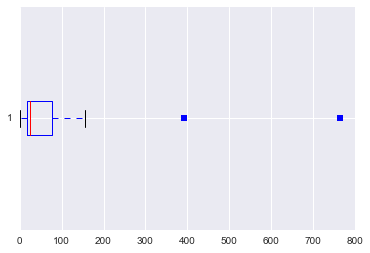

In [546]:
plt.boxplot(jjjfd['Unique'], 0, 'rs', 0)
plt.show()
plt.title?


# RUN LDA MODEL

In [530]:
#get file
df1 = pd.read_csv('tweetscopy.csv', header=0)
#combine text
df2=df1.groupby('author')['text'].apply(list)
#Turn into data fram
df3=df2.to_frame().reset_index()
#Create list of authors
df4=df3['author'].tolist()
#Use Senator Names as Index
df5 = pd.DataFrame(df2, index = df4)

In [573]:
for j in df4:
    print j
    cv = CountVectorizer(binary=False,
                         stop_words=['the','about','amp','a','from', 'has','by','an','at','on',
                                     'you','with','my','we','it','us','day','your','can','of','to','rt','and',
                                     'for','be','as','http','https','in','here','are','our',
                                     'their','for','is','that','have','this','co','see',
                                    'who','one','today','hi','up','will','kamalaharris','maziehirono'],
                         strip_accents='ascii'
                         ,
                         min_df=3)
    raw=df1[df1['author'] == str(j)]['text']
                         

  
    ##This Line Uses all tweets as 1 documents
    #docs = cv.fit_transform(df5.ix[j, 'text'])
    
    ##This Line Uses each tweet as it's own doc
    docs = cv.fit_transform(df1[df1['author'] == str(j)]['text'])

    # Build a mapping of numerical ID to word
    id2word = dict(enumerate(cv.get_feature_names()))

    # First we convert our word-matrix into gensim's format
    corpus = Sparse2Corpus(docs, documents_columns = False)

    # Then we fit an LDA model
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=3)

    num_topics = 3
    num_words_per_topic = 3
    for ti, topic in enumerate(lda_model.show_topics(num_topics = num_topics)):
        print("Topic: %d" % (ti))
        print (topic)
        print""
        peel=[j,ti,topic]
        Final_Data_Frame.append(peel)
    print ""   


Amy Klobuchar
Topic: 0
(0, u'0.025*"great" + 0.014*"mn" + 0.010*"thanks" + 0.010*"amyklobuchar" + 0.009*"good" + 0.006*"women" + 0.005*"happy" + 0.005*"economy" + 0.005*"people" + 0.005*"work"')

Topic: 1
(1, u'0.020*"mn" + 0.012*"bill" + 0.011*"thanks" + 0.008*"need" + 0.007*"help" + 0.006*"senate" + 0.006*"all" + 0.005*"new" + 0.005*"amyklobuchar" + 0.005*"spoke"')

Topic: 2
(2, u'0.012*"good" + 0.011*"amyklobuchar" + 0.008*"minnesota" + 0.007*"mn" + 0.007*"congrats" + 0.006*"news" + 0.006*"was" + 0.006*"new" + 0.005*"women" + 0.005*"honored"')


CatherineCortezMasto
Topic: 0
(0, u'0.019*"nvsen" + 0.013*"nevada" + 0.012*"catherinefornv" + 0.012*"senate" + 0.011*"nv" + 0.010*"his" + 0.009*"vote" + 0.008*"thank" + 0.008*"families" + 0.007*"heck4nevada"')

Topic: 1
(1, u'0.025*"heck4nevada" + 0.016*"nvsen" + 0.011*"nevada" + 0.010*"support" + 0.010*"realdonaldtrump" + 0.010*"out" + 0.009*"nv" + 0.007*"women" + 0.007*"nevadans" + 0.007*"great"')

Topic: 2
(2, u'0.015*"heck4nevada" + 0.01